## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data= pd.read_csv("/content/drive/My Drive/intern/train.csv")

In [3]:
data

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
data.shape

(31962, 3)

In [5]:
pd.isnull(data)

id  label  tweet
0      False  False  False
1      False  False  False
2      False  False  False
3      False  False  False
4      False  False  False
...      ...    ...    ...
31957  False  False  False
31958  False  False  False
31959  False  False  False
31960  False  False  False
31961  False  False  False

[31962 rows x 3 columns]

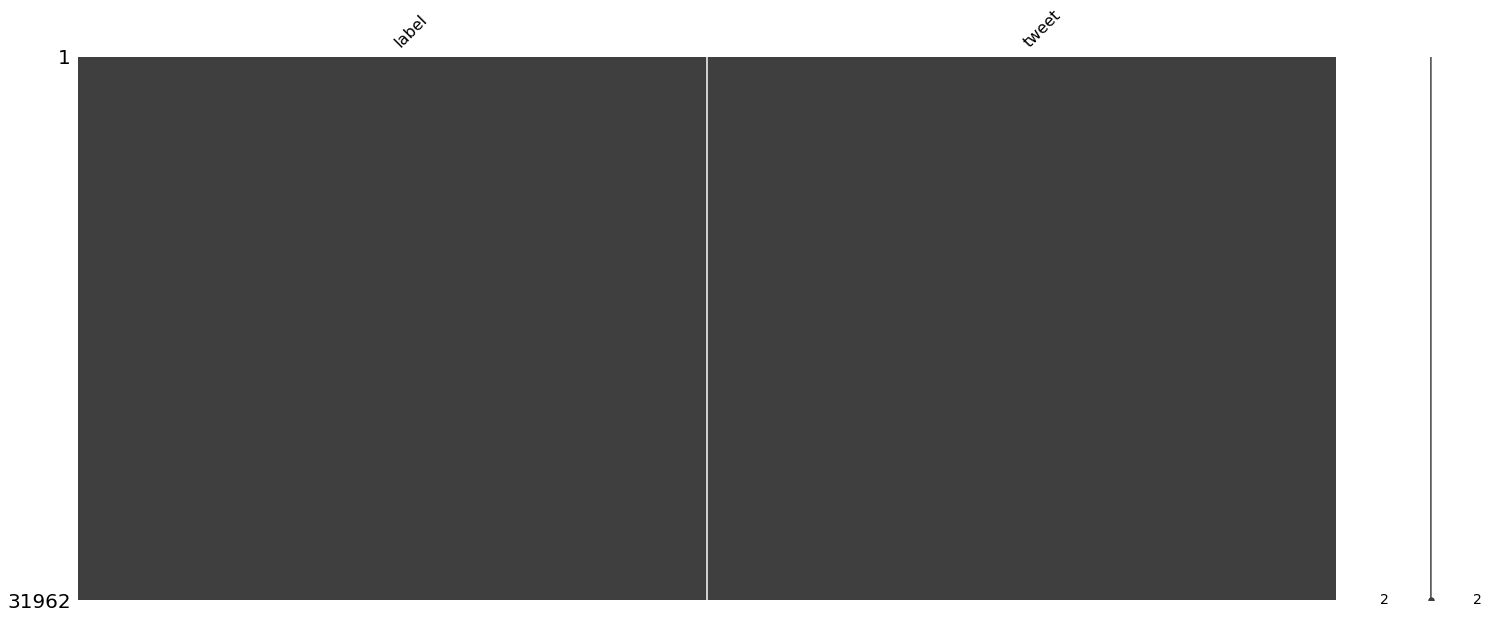

In [78]:
import missingno as msno
msno.matrix(data)

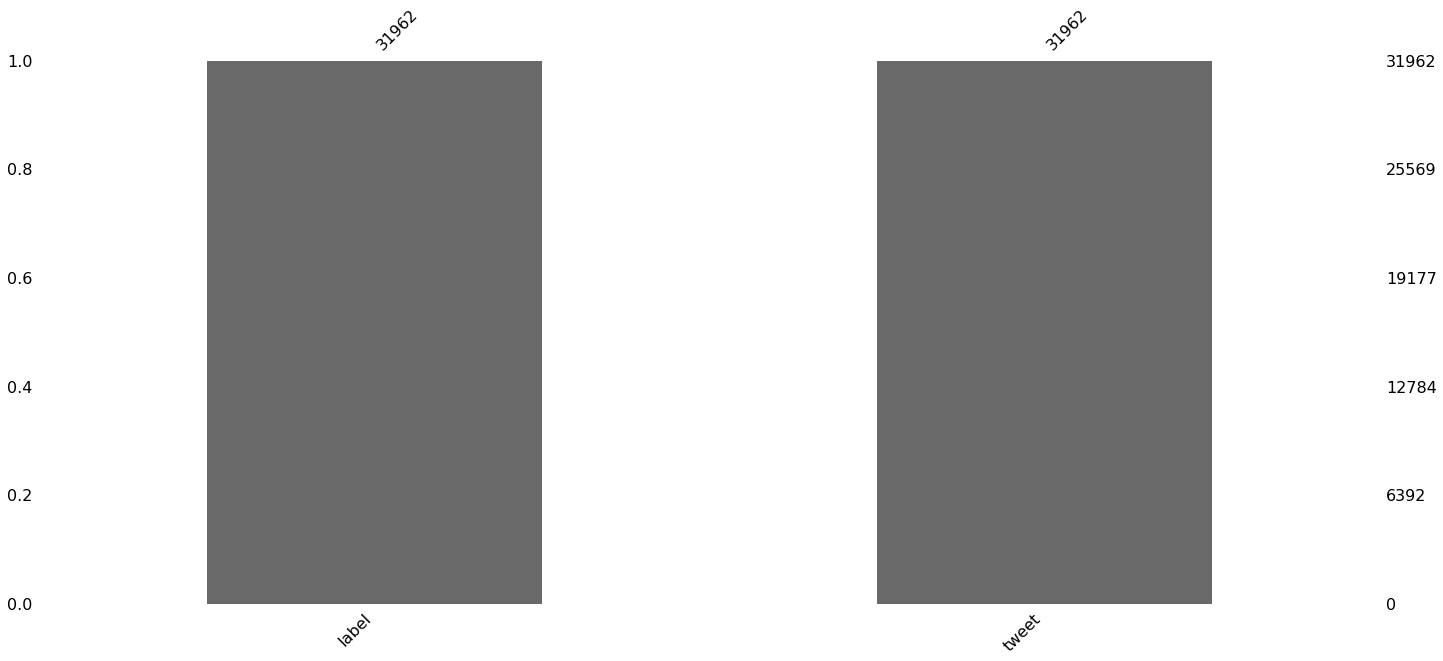

In [79]:
msno.bar(data)

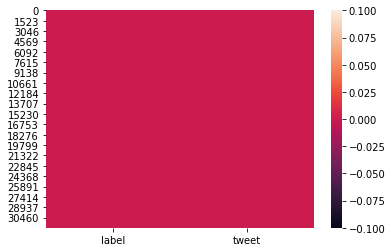

In [77]:
# Visualizing the missing values with heatmap
sns.heatmap(data.isna())

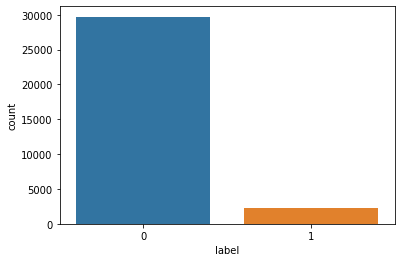

In [80]:
sns.countplot(data['label']) # plots the count of each category of label 

In [8]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [9]:
data.dtypes # checking the dtypes

id        int64
label     int64
tweet    object
dtype: object

In [10]:
data.isnull().sum() # checking the total nulls

id       0
label    0
tweet    0
dtype: int64

In [11]:
data.nunique() # checking the number of uniques in all the columns

id       31962
label        2
tweet    29530
dtype: int64

In [12]:
# return the description only for the  numerical columns
data.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [13]:
data.describe(include=['object'])

tweet
count                                               31962
unique                                              29530
top     #model   i love u take with u all the time in ...
freq                                                  319

In [14]:
data

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [16]:
## droping a column with id
data.drop("id",axis=1 , inplace=True)

In [17]:
data

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [22]:
# checking the occurances (or) frequeny of the values in a particular column
data['tweet'].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                                     319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets                                        82
aww yeah it's all good bing bong bing bong                                                                                                75
i'm so   and #grateful now that - #affirmations                                                                                           56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                                                      40
                                                                                                                                        ... 
stop wishing....sta doingðð #wednesdaywisdom #flowers #flower #spring   #... (vine by @user                                          1
@user @user h

In [23]:
data

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [24]:
## seperating the input and output into training and testing data
# training==> we will be training the model on the train data
## testing data==> check the  performance of the model on the test data


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.tweet,data.label,test_size = 0.2,random_state=2)


In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(25569,)
(25569,)
(6393,)
(6393,)


In [27]:
## countvectorize-->frequency 
from sklearn.feature_extraction.text import CountVectorizer
# obj for countvectorizer
count_vect = CountVectorizer()


In [28]:
# generate the word counts 
word_count_vector = count_vect.fit(X_train)
# to get feature name
word_count_vector.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0608',
 '0609',
 '0610',
 '0612',
 '0613',
 '0616',
 '0616ç',
 '0617',
 '0618',
 '0618â',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0tolerancemovie',
 '0ï',
 '0ð',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000â',
 '1001',
 '10014',
 '10025',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happysongs',
 '100k',
 '100ml',
 '100â',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '101ð',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '10a',
 '10am',
 '10days',
 '10k',
 '10kms',
 '10m',
 '10meses',
 '10miler',
 '10millionmiler',
 '10min',
 '10minutes',
 '10minutestogo'

In [29]:
doc_array = word_count_vector.transform(X_train)
doc_array

<25569x35976 sparse matrix of type '<class 'numpy.int64'>'
	with 293458 stored elements in Compressed Sparse Row format>

In [30]:
# converting to a data frame
doc_array = word_count_vector.transform(X_train).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
# converting the array into a dataframe
feature_matrix = pd.DataFrame(doc_array,columns=word_count_vector.get_feature_names())

In [32]:
feature_matrix

00  000  000001  001  0099  00am  ...  ð¼ð  ð¾ð  ð¾ð½ðµð  ó¾  øª  ø¹ù
0       0    0       0    0     0     0  ...    0    0        0   0   0    0
1       0    0       0    0     0     0  ...    0    0        0   0   0    0
2       0    0       0    0     0     0  ...    0    0        0   0   0    0
3       0    0       0    0     0     0  ...    0    0        0   0   0    0
4       0    0       0    0     0     0  ...    0    0        0   0   0    0
...    ..  ...     ...  ...   ...   ...  ...  ...  ...      ...  ..  ..  ...
25564   0    0       0    0     0     0  ...    0    0        0   0   0    0
25565   0    0       0    0     0     0  ...    0    0        0   0   0    0
25566   0    0       0    0     0     0  ...    0    0        0   0   0    0
25567   0    0       0    0     0     0  ...    0    0        0   0   0    0
25568   0    0       0    0     0     0  ...    0    0        0   0   0    0

[25569 rows x 35976 columns]

In [33]:
# TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # importing
tfidf = TfidfVectorizer() # object

In [34]:
# apply TFIDF on data(X_train)
X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<25569x35976 sparse matrix of type '<class 'numpy.float64'>'
	with 293458 stored elements in Compressed Sparse Row format>

In [35]:
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<6393x35976 sparse matrix of type '<class 'numpy.float64'>'
	with 67725 stored elements in Compressed Sparse Row format>

In [36]:
# Feature names
tfidf.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0608',
 '0609',
 '0610',
 '0612',
 '0613',
 '0616',
 '0616ç',
 '0617',
 '0618',
 '0618â',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0tolerancemovie',
 '0ï',
 '0ð',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000â',
 '1001',
 '10014',
 '10025',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happysongs',
 '100k',
 '100ml',
 '100â',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '101ð',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '10a',
 '10am',
 '10days',
 '10k',
 '10kms',
 '10m',
 '10meses',
 '10miler',
 '10millionmiler',
 '10min',
 '10minutes',
 '10minutestogo'

In [37]:
# position of the words in the sparse matrix
tfidf.vocabulary_

{'act': 1220,
 'instagram': 16243,
 'look': 18943,
 'who': 34683,
 'back': 3027,
 'home': 15023,
 'user': 33362,
 'all': 1744,
 'due': 9786,
 'respect': 26591,
 'when': 34572,
 '20': 340,
 'were': 34451,
 'hired': 14895,
 'and': 2064,
 'wapo': 34070,
 'announced': 2188,
 'the': 31493,
 'objective': 22684,
 'was': 34104,
 'to': 32082,
 'dig': 9008,
 'up': 33267,
 'di': 8929,
 'lost': 19013,
 'credibility': 7802,
 'god': 13364,
 'bless': 4323,
 'us': 33341,
 'pulse': 25466,
 'orlando': 23169,
 'prayers': 24938,
 'confused': 7279,
 'guncontrol': 14015,
 'lgbt': 18418,
 'pride': 25107,
 'gay': 12880,
 'love': 19055,
 'peaceâ': 23839,
 'went': 34444,
 'fye': 12709,
 'they': 31729,
 'didn': 8973,
 'have': 14457,
 'your': 35607,
 'album': 1671,
 'betterweather': 3913,
 'notbetterweather': 22409,
 'gym': 14070,
 'done': 9441,
 'vegan': 33526,
 'diet': 8994,
 'food': 12099,
 'flowers': 11999,
 'motivation': 21000,
 'health': 14560,
 'healthy': 14574,
 'me': 20049,
 'lushâ': 19327,
 'carlpaladin

In [38]:
# idf of the terms
tfidf.idf_

array([ 7.41150545,  7.97112124, 10.05056278, ...,  6.6493654 ,
       10.45602789, 10.05056278])

In [39]:
# apply the naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB #import
model_BernNB = BernoulliNB() # object



In [40]:
#Applying the Algorithm
model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [41]:
# predicting on test data
#syntex: objectname.predict(imputvalues)
y_test_pred = model_BernNB.predict(X_test_transformed)

In [42]:
# compare actual values(y-test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix , classification_report
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[5914,    3],
       [ 391,   85]])

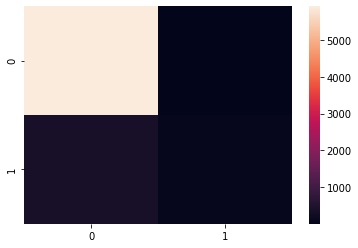

In [43]:
sns.heatmap(conf)

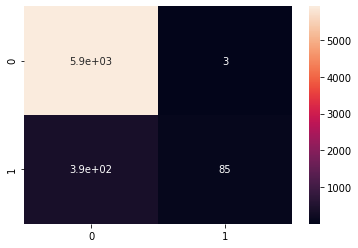

In [44]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

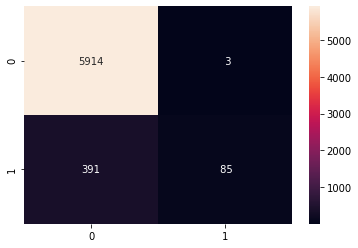

In [45]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True,fmt ='3.0f')

In [46]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5917
           1       0.97      0.18      0.30       476

    accuracy                           0.94      6393
   macro avg       0.95      0.59      0.63      6393
weighted avg       0.94      0.94      0.92      6393



In [47]:
# testing a tweet as positive or negative
new_tweet = pd.Series('retweet if you agree!')


# calculating tfidf values for the new message
new_tweet_transformed = tfidf.transform(new_tweet)

In [48]:
# predict the new message
model_BernNB.predict(new_tweet_transformed)

array([0])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_test_pred)

0.9383700922884405

### Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [53]:
reg.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_test_pred_lg = reg.predict(X_test_transformed)

In [55]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test,y_test_pred_lg)

array([[5905,   12],
       [ 346,  130]])

In [56]:
print(classification_report(y_test,y_test_pred_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5917
           1       0.92      0.27      0.42       476

    accuracy                           0.94      6393
   macro avg       0.93      0.64      0.70      6393
weighted avg       0.94      0.94      0.93      6393



In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_test_pred_lg)

0.9440012513686845

## Multinomial NB

In [59]:
# import BernNB
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(X_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
#predicting on train data
y_test_pred_mnb = reg.predict(X_test_transformed)

In [61]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test,y_test_pred_mnb)

array([[5905,   12],
       [ 346,  130]])

In [62]:
print(classification_report(y_test,y_test_pred_mnb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5917
           1       0.92      0.27      0.42       476

    accuracy                           0.94      6393
   macro avg       0.93      0.64      0.70      6393
weighted avg       0.94      0.94      0.93      6393



In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_test_pred_mnb)

0.9440012513686845

## decision tree classifier

In [65]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
#initailization of object
dtree = DecisionTreeClassifier()

In [66]:
# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train_transformed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# Predict on training data
y_train_pred_dtc = dtree.predict(X_train_transformed)

In [68]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23803
           1       1.00      1.00      1.00      1766

    accuracy                           1.00     25569
   macro avg       1.00      1.00      1.00     25569
weighted avg       1.00      1.00      1.00     25569



In [69]:
confusion_matrix(y_train, y_train_pred_dtc)

array([[23803,     0],
       [    0,  1766]])

In [70]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred_dtc =  dtree.predict(X_test_transformed)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5917
           1       0.61      0.52      0.56       476

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [71]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train_transformed, y_train, cv =5)

array([0.94700821, 0.94720375, 0.94935471, 0.94857255, 0.94504205])

In [72]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [73]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [74]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1}

In [75]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 1)

# We need to fit the model to the data
clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
# Prediction on test data
pred_test = clf.predict(X_test_transformed)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5917
           1       0.82      0.33      0.47       476

    accuracy                           0.94      6393
   macro avg       0.88      0.66      0.72      6393
weighted avg       0.94      0.94      0.93      6393

